# FOCUS

**Analyzing the Growth of Startup**

## Lets Understand some of the most Interesting Patterns of Funding and Startups.

* **How Does the Funding Ecosystem changes with respect to Time?**
* **What is the General Amount that Startups get in India?**
* **Which Kind of Industries are more preferred for Startups?**
* **Does Location also play a role, In determining the Growth of a Startup?**
* **Who plays the main role in Indian Startups Ecosystem?**
* **What are the different Types of Funding for Startups?**

# Install Dependencies

In [35]:
# for mathematical operations
import numpy as np 

# for dataframe operations
import pandas as pd 

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# lets select  a background style
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16, 7)

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# for ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [36]:
# lets import the data
data = pd.read_csv("startup_funding.csv")

# change the column name
data.columns = ['SNo', 'Date','StartupName','IndustryVertical','SubVertical','City','InvestorsName','InvestmentType',
                'AmountInUSD','Remarks']
# there are some another string present
# let's clean the string
def clean_string(x):
    return str(x).replace('\\xc2\\xa0','').replace('\\\\xc2\\\\xa0','')

# now apply the function to clean the data
for col in ["StartupName", "IndustryVertical", "SubVertical", "City", 
            "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]:
    data[col] = data[col].apply(lambda x: clean_string(x))
data.head()


,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan


In [37]:
# check the column name 
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD', 'Remarks'],
      dtype='object')

In [38]:
# let's check the shape of the data 
print('Size of the data :-',data.shape)

Size of the data :- (3044, 10)


# Data Cleaning

In [39]:
# lets check the null value
total = data.isnull().sum().sort_values(ascending = False)

# lets calculate the percentage of the missing value
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)

# store the above two data into missing data
missing_data = pd.concat([total,percent], axis=1, keys = ['Total','Percent%'])
missing_data

,Total,Percent%
Remarks,0,0.0
AmountInUSD,0,0.0
InvestmentType,0,0.0
InvestorsName,0,0.0
City,0,0.0
SubVertical,0,0.0
IndustryVertical,0,0.0
StartupName,0,0.0
Date,0,0.0
SNo,0,0.0


In [40]:
# We see in the remarks column has Nan values 
# lets check the remark column
data['Remarks'].value_counts()

nan                              2625
Series A                          177
Series B                           64
Pre-Series A                       37
Series C                           28
                                 ... 
Pre-Series A Bridge round           1
More Details                        1
Funding happened in Sept 2015       1
Super angel round                   1
Strategic Funding (Series C)        1
Name: Remarks, Length: 70, dtype: int64

In [41]:
# here we drop the remarks column
data.drop(['Remarks'], axis=1)
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD', 'Remarks'],
      dtype='object')

In [42]:
data['AmountInUSD'].unique()

array(['20,00,00,000', '80,48,394', '1,83,58,860', '30,00,000',
       '18,00,000', '90,00,000', '15,00,00,000', '60,00,000',
       '7,00,00,000', '5,00,00,000', '2,00,00,000', '1,20,00,000',
       '3,00,00,000', '59,00,000', '20,00,000', '23,10,00,000',
       '4,86,000', '15,00,000', 'undisclosed', '2,60,00,000',
       '1,74,11,265', '13,00,000', '13,50,00,000', '3,00,000',
       '22,00,00,000', '1,58,00,000', '28,30,00,000', '1,00,00,00,000',
       '4,50,00,000', '58,50,00,000', 'unknown', '45,00,000', '33,00,000',
       '50,00,000', '1,80,00,000', '10,00,000', '1,00,00,000',
       '45,00,00,000', '16,00,000', '14,00,00,000', '3,80,80,000',
       '12,50,00,000', '1,10,00,000', '5,10,00,000', '3,70,00,000',
       '5,00,000', '11,00,00,000', '1,50,00,000', '65,90,000',
       'Undisclosed', '3,90,00,00,000', '1,90,00,000', '25,00,000',
       '1,45,000', '6,00,00,000', '1,60,00,000', '57,50,000', '3,19,605',
       '48,89,975.54', '7,50,00,000', '27,39,034.68', '1,51,09,500.0

In [43]:
# see their is some anather values present in ammount column 
# +,,undislosed ,n/a
# so we have to replace it

# function to clean the AmounInUsd Column
def clean_amount(x):
    x = ''.join([c for c in str(x) if c in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']])
    x = str(x).replace(",","").replace("+","")
    x = str(x).lower().replace("undisclosed","")
    x = str(x).lower().replace("n/a","")
    if x == '':
        x = '-999'
    return x

# lets apply the function on the column
data["AmountInUSD"] = data["AmountInUSD"].apply(lambda x: float(clean_amount(x)))

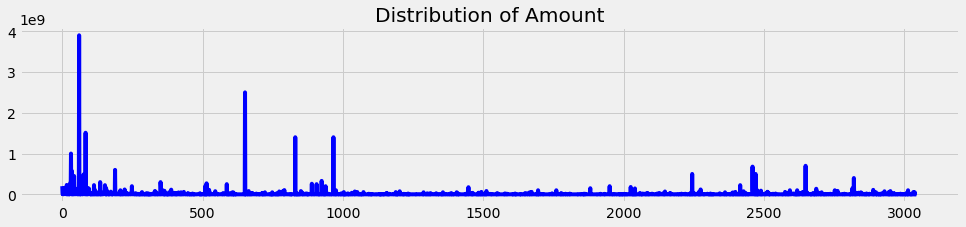

In [44]:
# Now lets check the distribution of the data 
# we use matplotlib library

plt.rcParams['figure.figsize'] = (15, 3)
data['AmountInUSD'].plot(kind = 'line', color = 'blue')
plt.title('Distribution of Amount')
plt.show()

In [45]:
data['Date'][data['Date']=='12/05.2015'] = '12/05/2015'
data['Date'][data['Date']=='13/04.2015'] = '13/04/2015'
data['Date'][data['Date']=='15/01.2015'] = '15/01/2015'
data['Date'][data['Date']=='22/01//2015'] = '22/01/2015'
data['Date'][data['Date']=='05/072018'] = '05/07/2018'
data['Date'][data['Date']=='01/07/015'] = '01/07/2015'
data['Date'][data['Date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

# How does the funding Ecosystem change with the Time

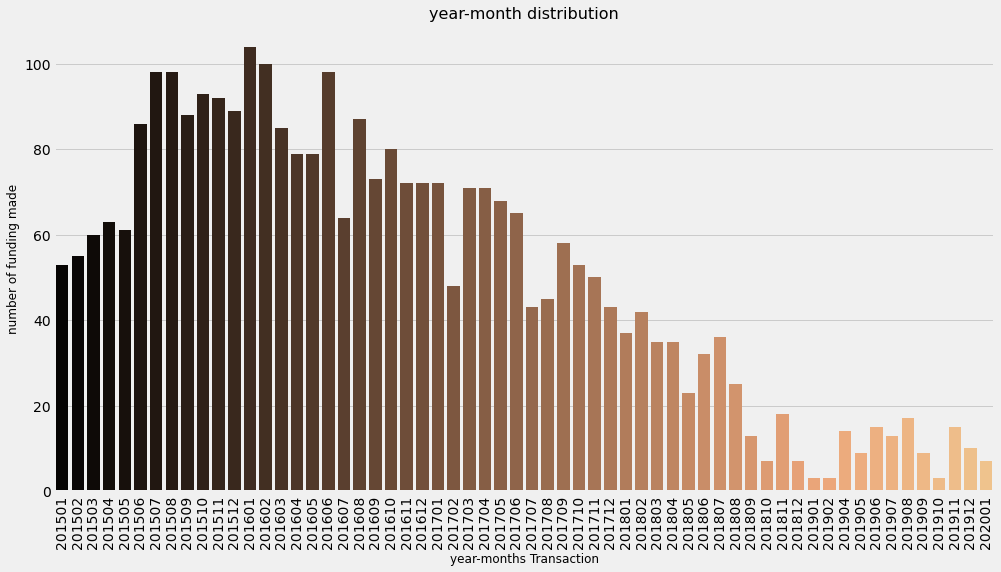

In [46]:
# some of the date formats are written wrongly so we have to clean them thoroughly so that we can analyze these values

# converting them into a Datetime object
data["yearmonth"] = (pd.to_datetime(data['Date'],
         format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(data['Date'],format='%d/%m/%Y').dt.month)

temp=data['yearmonth'].value_counts().sort_values(ascending=False).head(10)
# print(temp)
year_month = data['yearmonth'].value_counts()


# lets plot the data
plt.rcParams['figure.figsize'] = (15,8)
sns.barplot(year_month.index, year_month.values, palette='copper')
plt.xticks(rotation = 90)
plt.xlabel('year-months Transaction',fontsize=12)
plt.ylabel('number of funding made', fontsize = 12)
plt.title('year-month distribution', fontsize=16)
plt.show()



# what is the general amount that startups gets in india

In [47]:
# lets check the maximum funding of startup
print('Maximum funding to a startup', data['AmountInUSD'].sort_values(ascending=False).max())

Maximum funding to a startup 3900000000.0


In [48]:
# Lets check the minimum funding of startup
print('Minimum funding to a startup', data['AmountInUSD'].sort_values().min())

Minimum funding to a startup -999.0


In [49]:
# lets check the startup with more than 50 cr funding
@interact
def check_funding(column = 'AmountInUSD', x=500000000):
    return data[data[column]>x].sort_values(by='AmountInUSD',ascending=False)

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks,yearmonth
60,61,27/08/2019,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,3.900000e+09,nan,201908
651,652,11/08/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+09,nan,201708
83,84,06/06/2019,Pratilipi,Digital Media,E-Books,Bengaluru,Qiming Venture Partners,Series B,1.510950e+09,nan,201906
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,nan,201705
966,967,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,nan,201703
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,nan,201911
2648,2649,28/07/2015,Flipkart.com,Online Marketplace,nan,Bangalore,Steadview Capital and existing investors,Private Equity,7.000000e+08,"Late Stage, 10th Round More here",201507
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,nan,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,Late Stage (Alibaba @ 40% equity),201509
188,189,30/08/2018,True North,Finance,Private Equity Firm,Mumbai,nan,Private Equity,6.000000e+08,nan,201808
33,34,02/10/2019,Udaan,B2B,Business development,Bengaluru,"Altimeter Capital, DST Global",Series D,5.850000e+08,nan,201910


In [50]:
# lets check the different venture of paytm
data[data.StartupName=='Paytm']

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks,yearmonth
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,nan,201911
251,252,26/06/2018,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8.950000e+06,nan,201806
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,nan,201705
1493,1494,30/08/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,nan,201608
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,nan,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,Late Stage (Alibaba @ 40% equity),201509
2890,2891,13/03/2015,Paytm,nan,nan,nan,Ratan Tata,Private Equity,-9.990000e+02,More details,201503
2948,2949,05/02/2015,Paytm,nan,nan,nan,Ant Financial Services (Alipay),Private Equity,-9.990000e+02,Strategic Investment (25% stake),201502


In [51]:
data[data.StartupName =='Flipkart']

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks,yearmonth
651,652,11/08/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+09,nan,201708
773,774,26/06/2017,Flipkart,eCommerce,Online marketplace,Bangalore,Naspers,Private Equity,7.100000e+07,nan,201706
966,967,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,nan,201703
1032,1033,20/02/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,"Bennett, Coleman and Co. Ltd (BCCL)",Private Equity,3.870000e+07,nan,201702
2689,2690,04/06/2015,Flipkart,eCommerce platform,nan,Bangalore,Morgan Stanley,Private Equity,5.000000e+07,Late Stage,201506


In [52]:
# lets check the startup with least funding
data[['AmountInUSD', 'StartupName']].sort_values(by = 'AmountInUSD', ascending = True).head(5)

,AmountInUSD,StartupName
2125,-999.0,Splitkart
1464,-999.0,TAC Security
708,-999.0,FableStreet
709,-999.0,Monsoon Fintech
710,-999.0,MonkeyBox


In [53]:
# lets check how many startup get zero funding
data[data['AmountInUSD']==-999].shape

(971, 11)

In [54]:
# lets check the average funding
print('Average funding', data['AmountInUSD'].sort_values().mean())

Average funding 13270058.261169514


Total startup funded 2457
Swiggy           8
Ola Cabs         8
Paytm            7
Nykaa            6
Meesho           6
NoBroker         6
Medinfi          6
UrbanClap        6
Uniphore         5
Capital Float    5
Name: StartupName, dtype: int64


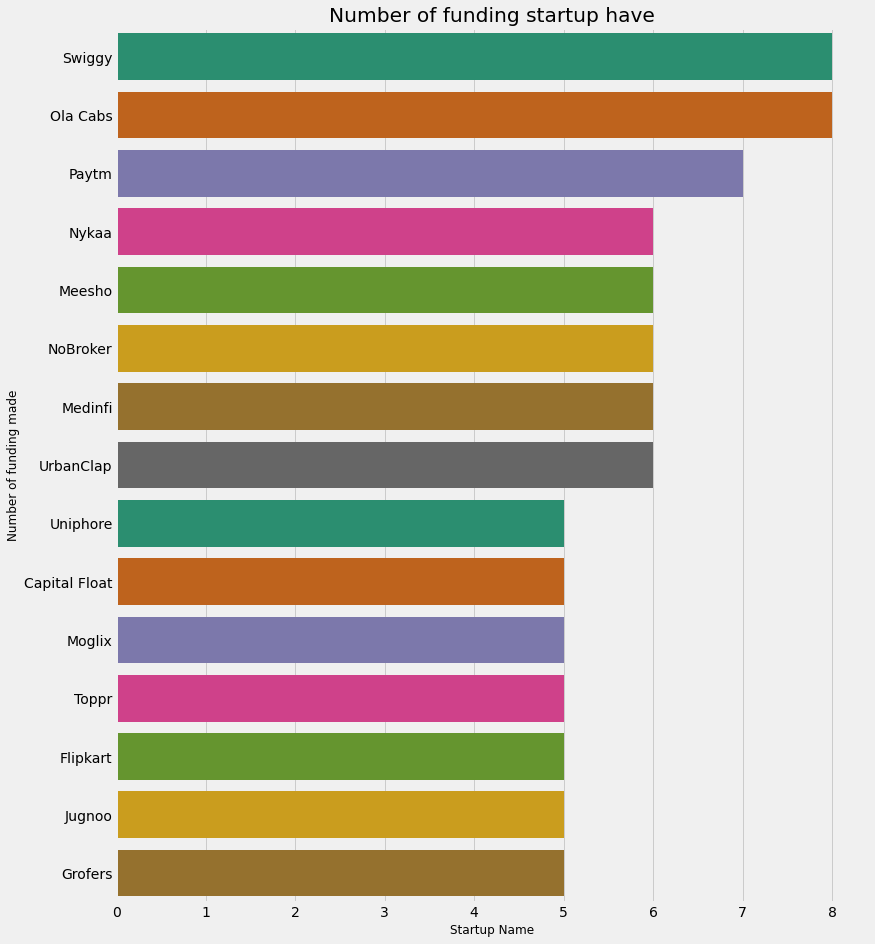

In [55]:
# lets check the funding each startup got
print('Total startup funded',len(data['StartupName'].unique()))
print(data['StartupName'].value_counts().head(10))
startupName  = data['StartupName'].value_counts().head(15)

# let plot the data
plt.rcParams['figure.figsize'] =(12,15)
sns.barplot(y=startupName.index , x=startupName.values, palette='Dark2')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of funding made',fontsize=12)
plt.title("Number of funding startup have")
plt.show()

# What kind of industries are more prefered for startup

In [56]:
data['IndustryVertical'].value_counts()
# there is nan value present in that column so we have to replace it

Consumer Internet                        941
Technology                               478
eCommerce                                186
nan                                      171
Healthcare                                70
                                        ... 
Event Ticketing platform                   1
Online Products Discovery Platform         1
Fitness Tracking Management Solutions      1
Fashion and Apparel                        1
Exam Preparation Platform                  1
Name: IndustryVertical, Length: 822, dtype: int64

Consumer Internet      941
Technology             478
eCommerce              186
Consumer Technology    172
Healthcare              70
Finance                 62
ECommerce               61
Logistics               32
E-Commerce              29
Education               24
Name: IndustryVertical, dtype: int64


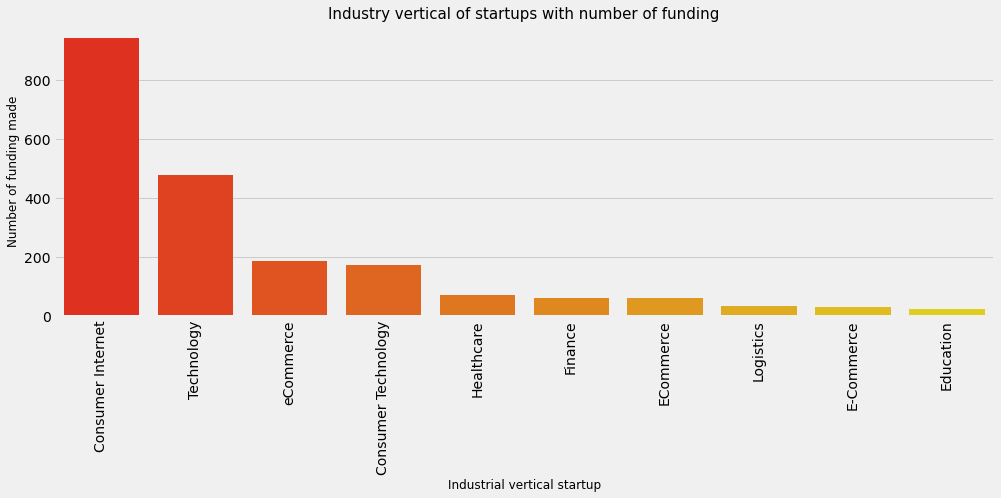

In [57]:
data['IndustryVertical'] = data['IndustryVertical'].replace('nan','Consumer Technology')
industry = data['IndustryVertical'].value_counts().head(10)
print(industry)


# lets plot the data
plt.rcParams['figure.figsize'] = (15,5)
sns.barplot(industry.index, industry.values, palette='autumn')
plt.xticks(rotation = 'vertical')
plt.xlabel('Industrial vertical startup', fontsize=12)
plt.ylabel('Number of funding made', fontsize=12)
plt.title('Industry vertical of startups with number of funding',fontsize=15)
plt.show()

Online Lending Platform                          11
Online Pharmacy                                  10
Food Delivery Platform                            8
Education                                         5
Online Learning Platform                          5
Online Lending                                    5
Online lending platform                           5
Online Education Platform                         5
Non-Banking Financial Company                     4
Online Food Delivery                              4
Online Insurance Aggregator                       3
Data Analytics platform                           3
Online Insurance Platform                         3
Online Marketplace                                3
Logistics                                         3
Online Gifting platform                           3
SaaS                                              3
Online Payment Gateway                            3
Agri-tech                                         3
Online platf

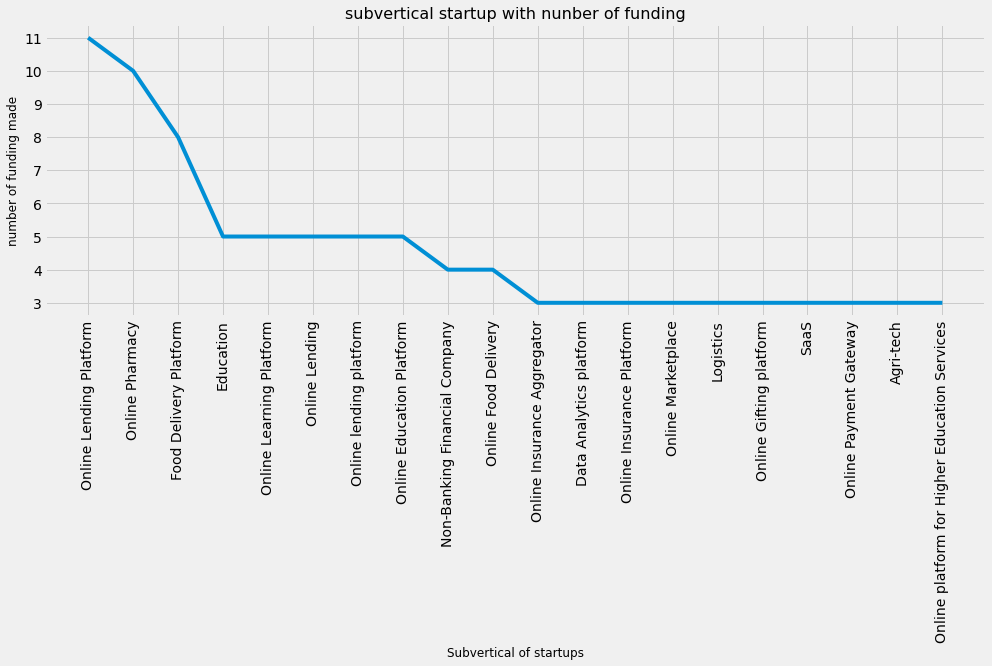

In [58]:
# lets analyze sub vertical industries
industry = data['SubVertical'].value_counts()[1:].head(20)
print(industry)

# let plot the data
sns.lineplot(industry.index, industry.values, palette='winter')
plt.xticks(rotation = 'vertical')
plt.xlabel('Subvertical of startups', fontsize=12)
plt.ylabel('number of funding made',fontsize=12)
plt.title('subvertical startup with nunber of funding', fontsize=16)
plt.show()

# Does loaction also play a roll in determine the growth if startup 


In [25]:
# lets check the city column
data['City'].value_counts()
# there is nan value so we have to replace it

Bangalore                 701
Mumbai                    568
New Delhi                 424
Gurgaon                   291
nan                       180
                         ... 
US/India                    1
Bhubneswar                  1
New Delhi / California      1
Varanasi                    1
Kolkatta                    1
Name: City, Length: 108, dtype: int64

In [26]:
data['City'].unique()

array(['Bengaluru', 'Gurgaon', 'New Delhi', 'Mumbai', 'Chennai', 'Pune',
       'Noida', 'Faridabad', 'San Francisco', 'San Jose,', 'Amritsar',
       'Delhi', 'Kormangala', 'Tulangan', 'Hyderabad', 'Burnsville',
       'Menlo Park', 'Gurugram', 'Palo Alto', 'Santa Monica', 'Singapore',
       'Taramani', 'Andheri', 'Chembur', 'Nairobi', 'Haryana', 'New York',
       'Karnataka', 'Mumbai/Bengaluru', 'Bhopal',
       'Bengaluru and Gurugram', 'India/Singapore', 'Jaipur', 'India/US',
       'Nagpur', 'Indore', 'New York, Bengaluru', 'California', 'India',
       'Ahemadabad', 'Rourkela', 'Srinagar', 'Bhubneswar', 'Chandigarh',
       'Delhi & Cambridge', 'Kolkatta', 'Kolkata', 'Coimbatore',
       'Bangalore', 'Udaipur', 'nan', 'Ahemdabad', 'Bhubaneswar',
       'Ahmedabad', 'Surat', 'Goa', 'Uttar Pradesh', 'Nw Delhi', 'Gaya',
       'Vadodara', 'Trivandrum', 'Missourie', 'Panaji', 'Gwalior',
       'Karur', 'Udupi', 'Kochi', 'Agra', 'Bangalore/ Bangkok', 'Hubli',
       'Kerala', 'Kozhi

Bangalore     1022
Mumbai         568
New Delhi      424
Gurgaon        291
Pune           105
Hyderabad       99
Chennai         97
Noida           93
Gurugram        50
Ahmedabad       38
Delhi           34
Jaipur          30
Kolkata         21
Indore          13
Chandigarh      11
Goa             10
Vadodara        10
Singapore        8
Coimbatore       5
Kanpur           4
Name: City, dtype: int64


C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


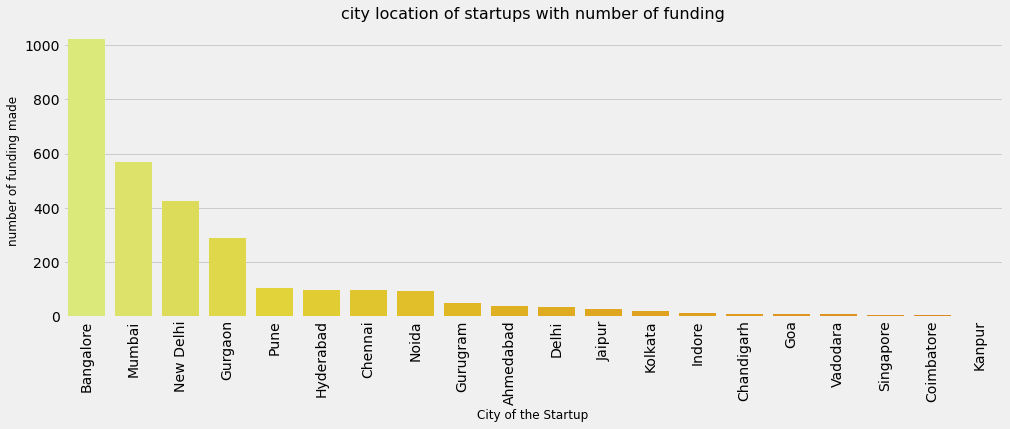

In [27]:
data['City'] = data['City'].replace(('Bengaluru','nan'),('Bangalore','Bangalore'))
city = data['City'].value_counts().head(20)
print(city)

# lets plot the data
sns.barplot(city.index,city.values,palette='Wistia')
plt.xticks(rotation='vertical')
plt.xlabel('City of the Startup',fontsize=12)
plt.ylabel('number of funding made',fontsize=12)
plt.title("city location of startups with number of funding", fontsize=16)
plt.show()

# Who plays the main role in Indian Startups Ecosystem?

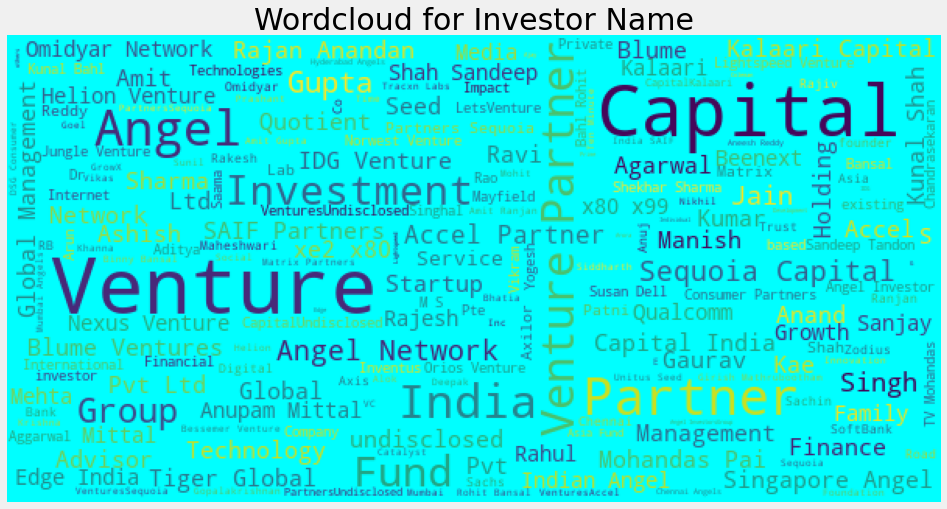

In [28]:
from wordcloud import WordCloud

name = data['InvestorsName'][~pd.isnull(data['InvestorsName'])]
wordcloud = WordCloud(max_font_size = 50, width=600, height=300, background_color='cyan').generate(''.join(name))
plt.figure(figsize =(15,8))
plt.title('Wordcloud for Investor Name', fontsize=30)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [29]:
# lrts analyze the investors on startup
investors = data['InvestorsName'].value_counts().head(20)
print(investors)

Undisclosed Investors       39
Undisclosed investors       30
Ratan Tata                  25
Indian Angel Network        24
nan                         24
Kalaari Capital             16
Sequoia Capital             15
Group of Angel Investors    15
Undisclosed Investor        12
Accel Partners              12
Undisclosed                 11
undisclosed investors       11
Brand Capital               11
Venture Catalysts           11
SAIF Partners               10
RoundGlass Partners         10
Undisclosed investor         9
Nexus Venture Partners       9
Tiger Global                 9
Info Edge (India) Ltd        9
Name: InvestorsName, dtype: int64


In [30]:
# lets clean the data
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'undisclosed Investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'nan'] = 'Undisclosed Investors'


<ipython-input-30-ce537f790cbe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['InvestorsName'][data['InvestorsName'] == 'Undisclosed investors'] = 'Undisclosed Investors'
<ipython-input-30-ce537f790cbe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['InvestorsName'][data['InvestorsName'] == 'undisclosed Investors'] = 'Undisclosed Investors'
<ipython-input-30-ce537f790cbe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


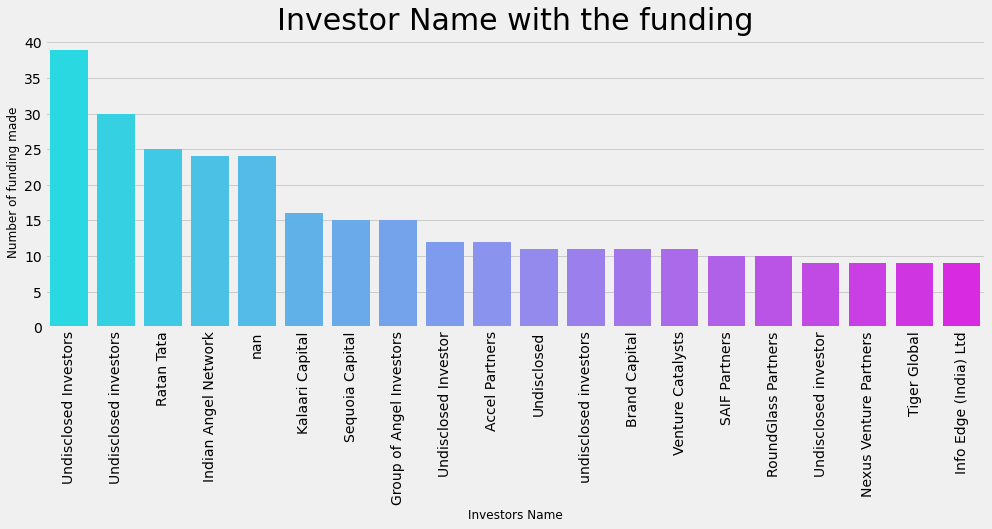

In [33]:
# lets plot the data
sns.barplot(investors.index, investors.values, palette='cool')
plt.xticks(rotation = 'vertical')
plt.xlabel('Investors Name', fontsize=12)
plt.ylabel('Number of funding made', fontsize=12)
plt.title('Investor Name with the funding',fontsize=30)
plt.show()

# What are the different Types of Funding for Startups?

Private Equity          1356
Seed Funding            1355
Seed/ Angel Funding       60
Seed / Angel Funding      47
Seed\\nFunding            30
Debt Funding              25
Series A                  24
Seed/Angel Funding        23
Series B                  20
Series C                  14
Name: InvestmentType, dtype: int64


<ipython-input-34-412cc37c3ffd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['InvestmentType'][data['InvestmentType'] == 'SeedFunding'] = 'Seed Funding'
<ipython-input-34-412cc37c3ffd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['InvestmentType'][data['InvestmentType'] == 'Crowd funding'] = 'Crowd Funding'
<ipython-input-34-412cc37c3ffd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['InvestmentType'][data['In

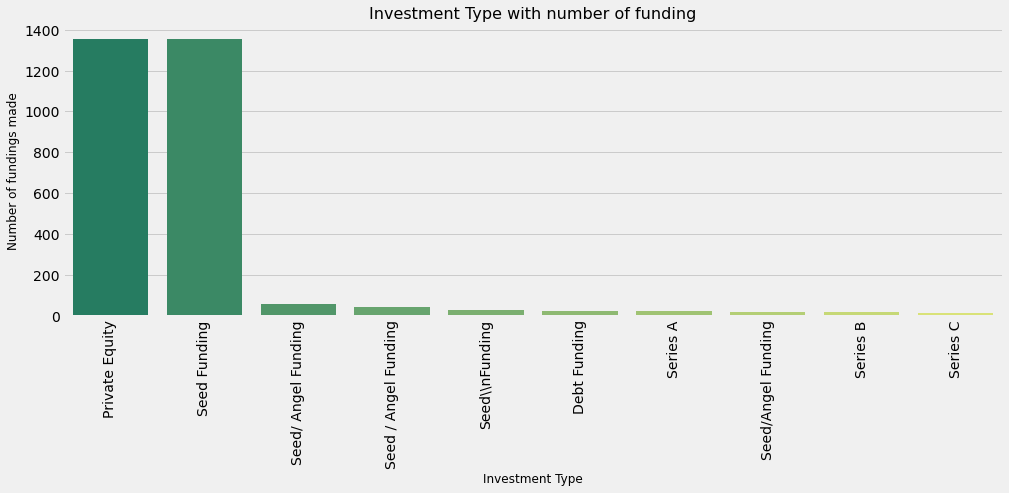

In [34]:
# lets analyze the investment
investment = data['InvestmentType'].value_counts().head(10)
print(investment)

# lets clean the dataset
data['InvestmentType'][data['InvestmentType'] == 'SeedFunding'] = 'Seed Funding'
data['InvestmentType'][data['InvestmentType'] == 'Crowd funding'] = 'Crowd Funding'
data['InvestmentType'][data['InvestmentType'] == 'PrivateEquity'] = 'Private Equity'

# lets plot the data
sns.barplot(investment.index, investment.values, palette = 'summer')
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()